<center>
<img src="https://habrastorage.org/webt/ia/m9/zk/iam9zkyzqebnf_okxipihkgjwnw.jpeg" />
    
## [mlcourse.ai](https://mlcourse.ai) - Open Machine Learning Course

Автор: [Yury Kashnitsky](https://yorko.github.io). Все материалы распространяются под [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).

# Задание #7
   
## Анализ Главных Компонент и Кластеризация

In this assignment, we are going to walk through `sklearn` built-in implementations of dimensionality reduction and clustering methods and apply these techniques to the popular "faces" dataset.


**Your task is to:**
 1. write code and perform computations in the cells below;
 2. choose answers in the [webform](https://forms.gle/W1dtNVMSVpSQBt7s5).
 
*If you are sure that something is not 100% correct with the assignment/solution, please leave your feedback via the mentioned webform ↑*


## 1. Principal Component Analysis

First import all required modules:

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style="white")
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Use the given toy data set:

In [2]:
X = np.array(
    [
        [2.0, 13.0],
        [1.0, 3.0],
        [6.0, 19.0],
        [7.0, 18.0],
        [5.0, 17.0],
        [4.0, 9.0],
        [5.0, 22.0],
        [6.0, 11.0],
        [8.0, 25.0],
    ]
)

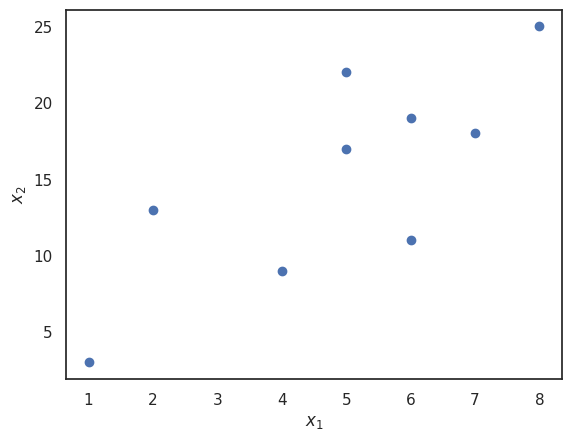

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$");

**Вопрос 1. Каков угол между осью $x_1$ и вектором, соответствующим первой главной компоненте, для этих данных (не забудьте отмасштабировать данные с помощью `StandardScaler`)?**

- 30 градусов
- 45 градусов
- 60 градусов
- 75 градусов

**Ответ:** 45 градусов

In [4]:
X_scaled = StandardScaler().fit_transform(X)

U, S, VT = np.linalg.svd(X_scaled)

first_principal_component = VT.T[:, 0]

angle = np.degrees(
    np.arctan2(first_principal_component[1], first_principal_component[0])
)

print(angle)

45.000000000000014


**Вопрос 2. Каковы собственные значения матрицы $X^{\text{T}}X$, заданной $X$ - масштабной матрицей из предыдущего вопроса?**

 - 4 и 1.42
 - 16.2 и 2702.8
 - 4.02 и 51.99
 - 15.97 и 2.03
 
 **Ответ:** 15.97 и 2.03

In [5]:
np.linalg.eig(X_scaled.T.dot(X_scaled))[0]

array([15.96987204,  2.03012796])

**Вопрос 3. Что означают два числа из предыдущего вопроса?**

- их квадраты показывают, какая часть дисперсии исходных данных объясняется главными компонентами
- они определяют угол поворота между первой главной компонентой и исходной осью
- эти числа показывают, какая часть дисперсии исходных данных объясняется главными компонентами
- квадратные корни этих чисел определяют угол поворота между первой главной компонентой и исходной осью

**Ответ:** 3.

Загрузим набор данных с лицами людей и выведем их имена. (Для выполнения этого шага необходимо стабильное и быстрое подключение к Интернету.)

In [6]:
lfw_people = datasets.fetch_lfw_people(
    min_faces_per_person=50, resize=0.4, data_home="../data/faces"
)

print(
    "%d objects, %d features, %d classes"
    % (lfw_people.data.shape[0], lfw_people.data.shape[1], len(lfw_people.target_names))
)
print("\nPersons:")
for name in lfw_people.target_names:
    print(name)

1560 objects, 1850 features, 12 classes

Persons:
Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair


Давайте рассмотрим несколько лиц. Все изображения хранятся в массиве `lfw_people.images`.

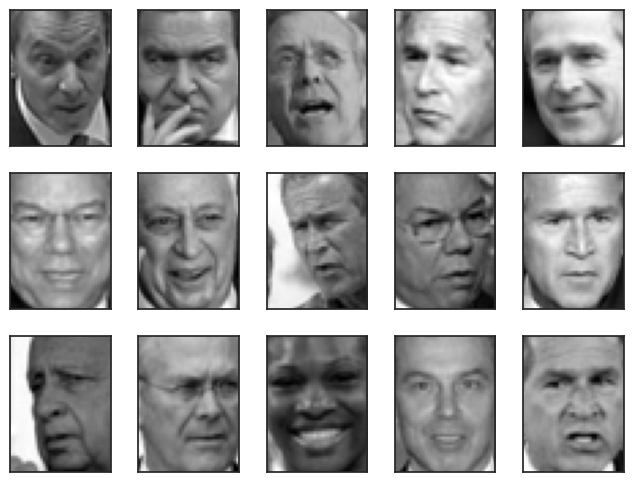

In [7]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap="gray")

**Вопрос 4. Какое _минимальное_ количество главных компонент необходимо для объяснения 90% дисперсии в данных (масштабированных с помощью `StandardScaler`)?**

- 75
- 76
- 77
- 78

Для этой задачи следует использовать параметр [`svd_solver='randomized'`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), который является аппроксимацией PCA, но значительно увеличивает производительность на больших наборах данных. Для получения сопоставимых результатов используйте фиксированное значение `random_state=1`.

**Ответ:** 77

1560 principal components explain 100.00% of variance


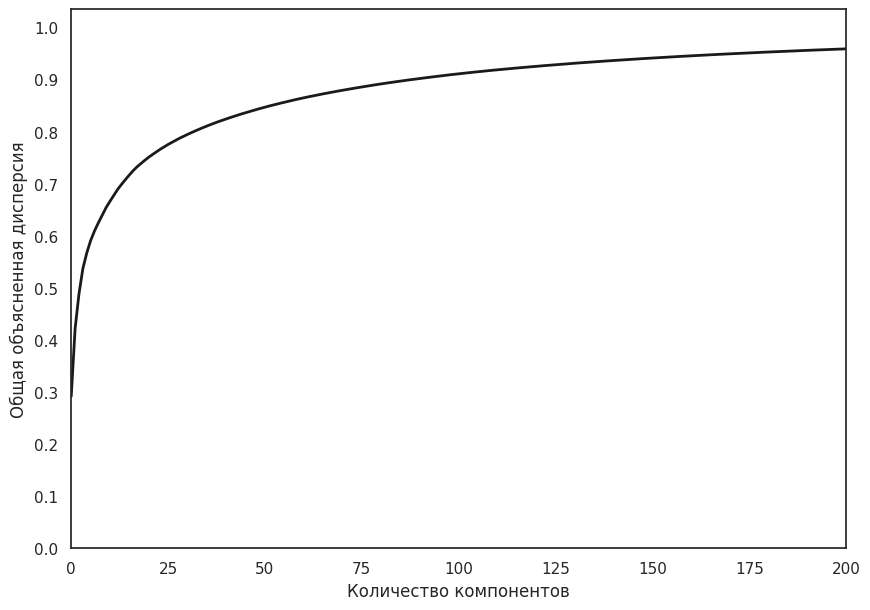

In [8]:
pca = PCA(svd_solver="randomized", random_state=1)

scaler = StandardScaler()
faces_scaled = scaler.fit_transform(lfw_people.data)

pca.fit(faces_scaled)

print(
    "%d principal components explain %.2f%% of variance"
    % (pca.n_components_, 100 * np.cumsum(pca.explained_variance_ratio_)[-1])
)

plt.figure(figsize=(10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), lw=2, color="k")
plt.xlabel("Количество компонентов")
plt.ylabel("Общая объясненная дисперсия")
plt.xlim(0, 200)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show();

In [9]:
np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9)

(array([  88,   89,   90, ..., 1557, 1558, 1559]),)

Выведите картинку, показывающую первые 30 главных компонент (не пугайтесь, когда увидите результат). Для ее создания используйте 30 векторов из `pca.components_`, переформируйте их в исходный размер (50 x 37) и выведите на экран. Укажите `cmap`='binary'.

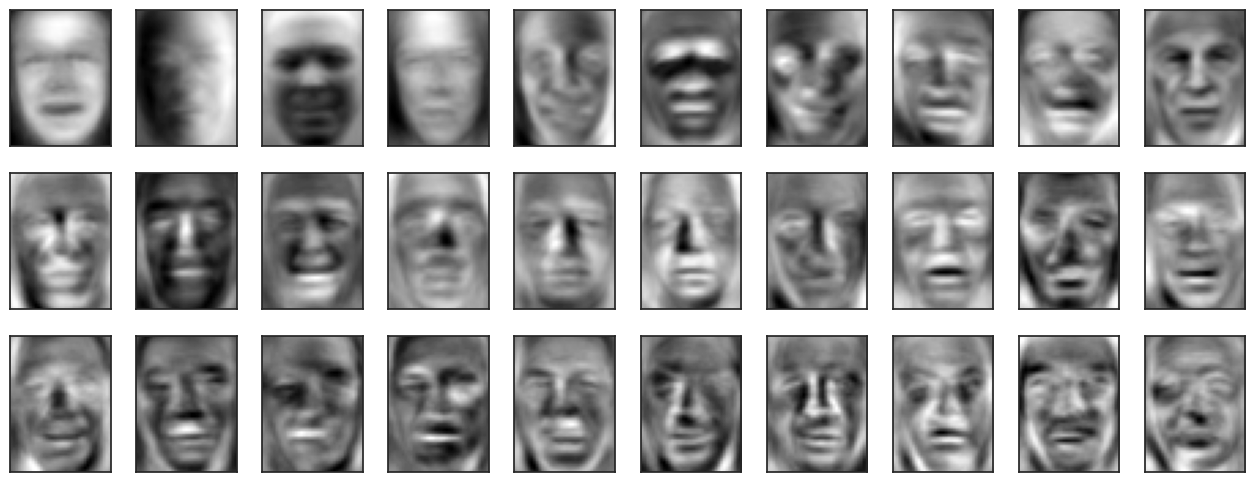

In [10]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50, 37)), cmap="binary")

**Вопрос 5. Какая из первых 30 главных компонент осветляет левую часть лица? Точнее, какая главная компонента соответствует линейной комбинации исходных признаков (интенсивности пикселей), которая, будучи представленной в виде изображения, выглядит как фотография, подсвеченная с правой стороны (то же самое, что лицо, подсвеченное с левой стороны)?**

- 1
- 2
- 4
- 5

**Ответ:** 2

Теперь создадим проекцию граней на пространство первых двух главных компонент.

**Вопрос 6. Кто меньше всего похож на других людей в наборе данных, если рассматривать только две первые главные компоненты?**

Для ответа на этот вопрос возьмем первые две главные компоненты из масштабированных данных, оценим два средних значения главных компонент для каждого человека по всем его изображениям в наборе данных (снова используем svd_solver='randomized' и random_state=1). Затем, имея 12 двумерных точек, найдите ту, которая имеет наибольшее расстояние от остальных (по евклидову расстоянию). Это можно сделать как точно, так и приблизительно, используя `sklearn.metrics.euclidean_distances` и `seaborn.heatmap`.

- Colin Powell
- George W Bush
- Jacques Chirac
- Serena Williams

**Ответ:** Serena Williams

In [11]:
lfw_people.target_names, len(lfw_people.target_names)

(array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
        'Gerhard Schroeder', 'Hugo Chavez', 'Jacques Chirac',
        'Jean Chretien', 'John Ashcroft', 'Junichiro Koizumi',
        'Serena Williams', 'Tony Blair'], dtype='<U17'),
 12)

In [12]:
pca = PCA(n_components=2, svd_solver="randomized", random_state=1)
pca.fit(faces_scaled)

mean_face_centers = []

for i, name in enumerate(lfw_people.target_names):
    cloud = pca.transform(faces_scaled[lfw_people.target == i])
    mean_face_centers.append(cloud.mean(axis=0))

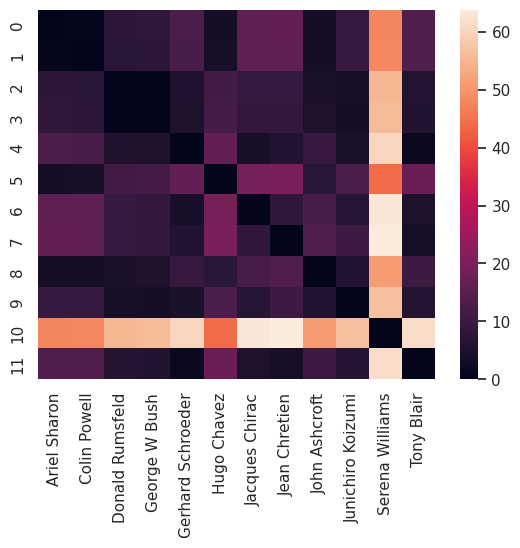

In [13]:
sns.heatmap(metrics.euclidean_distances(mean_face_centers))
plt.xticks(np.arange(12) + 0.5, lfw_people.target_names, rotation="vertical");

## 2. Кластеризация

Для следующего вопроса загрузите набор данных по ценам на жилье:

In [14]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X = data

Используя локтевой метод (ссылка [статья 7](https://mlcourse.ai/book/topic07/topic7_pca_clustering.html#choosing-the-number-of-clusters-for-k-means) курса), найти оптимальное число кластеров, которое следует задать в качестве гиперпараметра для алгоритма k-means.

**Вопрос 7. Какое оптимальное количество кластеров следует использовать для набора данных о ценах на жилье в соответствии с методом локтя? Используйте `random_state=1` в методе k-means и не масштабируйте данные.**

- 2
- 3
- 4
- 5

В данном случае мы ищем наиболее значимый излом кривой на графике `Количество кластеров vs Расстояния между центроидами`. Рассмотрим количество кластеров от 2 до 10. Для инициализации алгоритма k-means используйте `random_state=1`.

**Ответ:** 2

k=2: D(k)=0.325
k=3: D(k)=0.625
k=4: D(k)=0.328
k=5: D(k)=1.018
k=6: D(k)=0.632
k=7: D(k)=0.681
k=8: D(k)=0.907


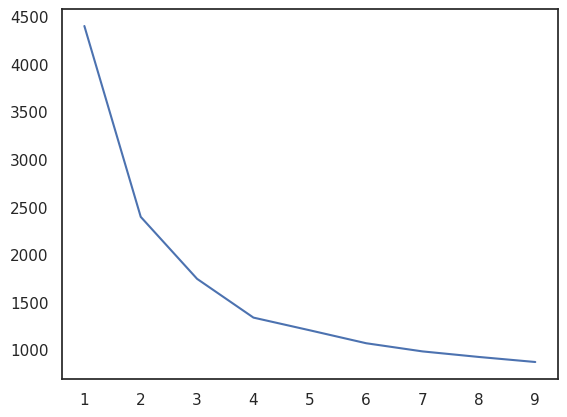

In [15]:
func = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1).fit(X)
    func.append(np.sqrt(kmeans.inertia_))

scores = []
for i in range(1, 8):
    scores.append((func[i] - func[i + 1]) / (func[i - 1] - func[i]))
    print(f"k={i + 1}: D(k)={round(scores[i - 1], 3)}")

plt.plot(range(1, 10), func);

Вернитесь к набору данных лиц (уже масштабированному). Представьте, что мы не знаем имен тех, кто изображен на каждой фотографии, но знаем, что это 12 разных людей. Сравним результаты кластеризации по 4 алгоритмам - k-means, Agglomerative clustering, Affinity Propagation и Spectral clustering. Используем те же параметры, что и в конце [этой статьи] (https://mlcourse.ai/book/topic07/topic7_pca_clustering.html#codecell24), только изменим количество кластеров на 12.

In [16]:
from sklearn.cluster import (AffinityPropagation, AgglomerativeClustering,
                             KMeans, SpectralClustering)

algorithms = [
    KMeans(n_clusters=12, n_init=10, random_state=1),
    AffinityPropagation(),
    SpectralClustering(n_clusters=12, random_state=1, affinity="nearest_neighbors"),
    AgglomerativeClustering(n_clusters=12),
]

res = []
for algo in algorithms:
    algo.fit(faces_scaled)
    res.append(
            {
                "ARI": metrics.adjusted_rand_score(lfw_people.target, algo.labels_),
                "AMI": metrics.adjusted_mutual_info_score(
                    lfw_people.target, algo.labels_
                ),
                "Homogenity": metrics.homogeneity_score(
                    lfw_people.target, algo.labels_
                ),
                "Completeness": metrics.completeness_score(
                    lfw_people.target, algo.labels_
                ),
                "V-measure": metrics.v_measure_score(lfw_people.target, algo.labels_),
                "Silhouette": metrics.silhouette_score(faces_scaled, algo.labels_),
            }
    )

results = pd.DataFrame(
    data=res,
    columns=["ARI", "AMI", "Homogenity", "Completeness", "V-measure", "Silhouette"],
    index=["KMeans", "Affinity", "Spectral", "Agglomerative"],
)

In [17]:
results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
KMeans,0.030714,0.080523,0.103417,0.091314,0.096989,0.050985
Affinity,0.015685,0.113850,0.287448,0.148215,0.195583,0.017013
Spectral,0.030712,0.089895,0.110409,0.103830,0.107018,0.042063
Agglomerative,0.023452,0.070913,0.092675,0.083420,0.087804,0.029671


**Вопрос 8. Выберите все правильные утверждения:**

- Агломеративная кластеризация работает лучше других по всем метрикам
- Результаты кластеризации неутешительны: ни одна из метрик не превысила 0.35
- Рассматривая только 2 кластера (Серена Уильямс или нет) и сравнивая результаты кластеризации с бинарным вектором, мы видим, что алгоритмы кластеризации работают лучше, причем некоторые метрики превышают 66%

**Ответ:** 2, 3

In [18]:
algorithms2 = [
    KMeans(n_clusters=2, n_init=10, random_state=1),
    AffinityPropagation(),
    SpectralClustering(n_clusters=2, random_state=1, affinity="nearest_neighbors"),
    AgglomerativeClustering(n_clusters=2),
]

is_serena = (lfw_people.target == 10).astype("int")

res2 = []
for algo in algorithms2:
    algo.fit(faces_scaled)
    res2.append(
            {
                "ARI": metrics.adjusted_rand_score(is_serena, algo.labels_),
                "AMI": metrics.adjusted_mutual_info_score(is_serena, algo.labels_),
                "Homogenity": metrics.homogeneity_score(is_serena, algo.labels_),
                "Completeness": metrics.completeness_score(is_serena, algo.labels_),
                "V-measure": metrics.v_measure_score(is_serena, algo.labels_),
                "Silhouette": metrics.silhouette_score(faces_scaled, algo.labels_),
            }
    )

results2 = pd.DataFrame(
    data=res2,
    columns=["ARI", "AMI", "Homogenity", "Completeness", "V-measure", "Silhouette"],
    index=["KMeans", "Affinity", "Spectral", "Agglomerative"],
)

In [19]:
results2

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
KMeans,0.044684,0.072605,0.203250,0.044747,0.073347,0.156979
Affinity,0.001713,0.037150,0.705994,0.024969,0.048232,0.017013
Spectral,0.139674,0.130505,0.312447,0.083128,0.131319,0.171499
Agglomerative,0.095746,0.097363,0.249834,0.061072,0.098151,0.144989


Используйте координаты 12 "средних" изображений людей, которые вы получили ранее. Постройте для них дендрограмму. Используйте `scipy.cluster.hierarchy` и `scipy.spatial.distance.pdist`, значения параметров возьмите из соответствующего примера в [статье](https://mlcourse.ai/book/topic07/topic7_pca_clustering.html#codecell23).

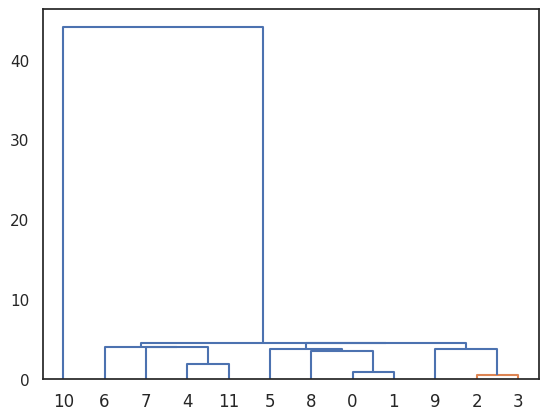

In [20]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(mean_face_centers)
Z = hierarchy.linkage(distance_mat, "single")
# plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

**Вопрос 9. Посмотрите на дендрограмму и определите шаг, когда останется всего два кластера: Серена Уильямс против всех.  Кто последним был добавлен в "большой" кластер?**

- Gerhard Schroeder
- Jean Chretien
- John Ashcroft
- Junichiro Koizumi

**Ответ:** Jean Chretien

In [21]:
lfw_people.target_names[7]

'Jean Chretien'